In [1]:
# Example plots ADV data Hybrid Dune Campaign

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [8]:
nc_raw = r'O:\HybridDune experiment\data ADV, OBS\raw NetCDF\ADV S3ADV2 raw data - period 1 20mins.nc'
nc_QC  = r'O:\HybridDune experiment\data ADV, OBS\QC\ADV S3ADV2 QC - period 1, 20mins.nc'

ds_raw = xr.open_dataset(nc_raw)
ds_QC = xr.open_dataset(nc_QC)

ds_QC # print the variables in ds_processed

<xarray.Dataset> Size: 285MB
Dimensions:       (t: 414, N: 9573, t_theta: 3, t_zb: 4, t_zi: 2)
Coordinates:
  * t             (t) datetime64[ns] 3kB 2024-12-17T10:00:00 ... 2024-12-23T0...
  * N             (N) float64 77kB 0.0 0.125 0.25 ... 1.196e+03 1.196e+03
  * t_theta       (t_theta) datetime64[ns] 24B 2024-12-17T10:00:00 ... 2024-1...
  * t_zb          (t_zb) datetime64[ns] 32B 2024-12-17T11:30:00 ... 2024-12-2...
  * t_zi          (t_zi) datetime64[ns] 16B 2024-12-17T11:30:00 2024-12-21T14...
    maskp         (t, N) bool 4MB ...
    maskv         (t, N) bool 4MB ...
    maskd         (t, N) bool 4MB ...
    mask_OBShigh  (t, N) bool 4MB ...
    mask_OBSlow   (t, N) bool 4MB ...
Data variables: (12/43)
    sf            float64 8B ...
    u             (t, N) float64 32MB ...
    v             (t, N) float64 32MB ...
    w             (t, N) float64 32MB ...
    burst         (t, N) float64 32MB ...
    pm            (t) float64 3kB ...
    ...            ...
    pc            (t, N) float64 32MB ...
    eta           (t, N) float64 32MB ...
    zsmean        (t) float64 3kB ...
    h             (t) float64 3kB ...
    C_OBShigh     (t, N) float64 32MB ...
    C_OBSlow      (t, N) float64 32MB ...
Attributes: (12/14)
    Conventions:               CF-1.6
    title:                     S3ADV2 raw data - period 1
    instrument:                Nortek Vector
    instrument serial number:  VEC13933
    connected OBS type:        Seapoint STM
    time zone:                 UTC+1
    ...                        ...
    contact person:            Daan Poppema
    emailadres:                d.w.poppema@tudelft.nl
    construction datetime:     20-Oct-2025 (18:24:23)
    version:                   v2
    version comments:          constructed with xarray
    comment:                   Quality checked data: pressure level corrected...

Text(0, 0.5, 'Average relative pressure (Pa)')

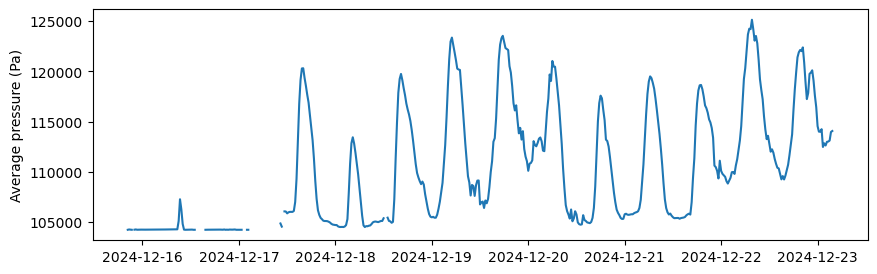

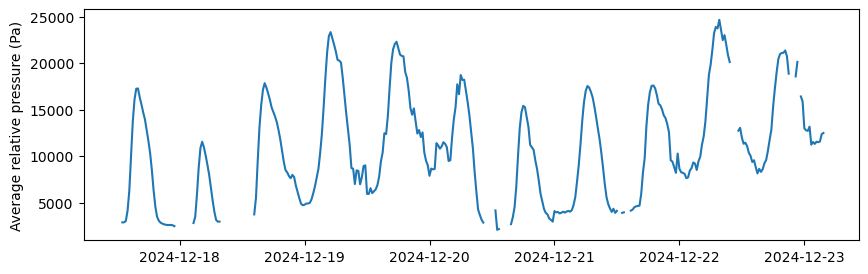

In [ ]:
# Compare pressure in raw and QC data. Use S3.ADV2, so the deep ADV
plt.figure(figsize=(10, 3))
p = ds_raw['p'].mean(axis=1)  # average pressure per 20min block
plt.plot(ds_raw.t,p)
plt.ylabel('Average pressure (Pa)')

# Make plot 2
plt.figure(figsize=(10, 3))
p = ds_QC['pc'].mean(axis=1)  # average pressure per 20min block
plt.plot(ds_QC.t,p)
plt.ylabel('Average relative pressure (Pa)')
# NB: different time coverage: raw data includes time when instrument was not yet mounted at location (but useful for calibration etc)

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dpoppema\AppData\Local\Temp\ipykernel_9124\3580713311.py:35: SyntaxWarning: invalid escape sequence '\s'
  ax3.plot(ds_QC.t, nans_dp,   's', markersize=5, label='|dp|<4$\sigma$')
C:\Users\dpoppema\AppData\Local\Temp\ipykernel_9124\3580713311.py:38: SyntaxWarning: invalid escape sequence '\s'
  ax3.plot(ds_QC.t, nans_du,   '|', markersize=10, label='du,v,w < 3$\sigma$')


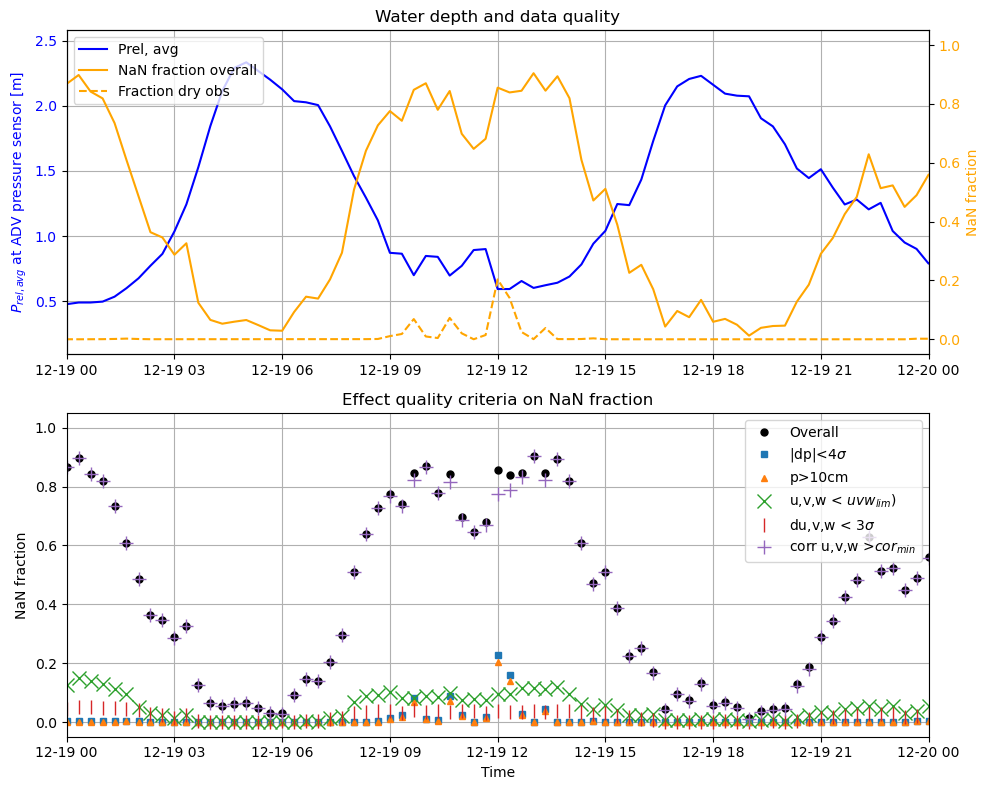

In [49]:
# Plot the avg relative pressure and the fraction of nans in the data
p = ds_QC['pc'].mean(axis=1)/10000
frac_nans = ds_QC['u'].isnull().sum(axis=1) / ds_QC.sizes['N']

nans_dp  = 1 - ds_QC['maskp'].mean(axis=1)  # |dp| < 4sigma
nans_dry = 1 - ds_QC['maskd'].mean(axis=1)  # p < 10cm
nans_u   = 1 - ds_QC['mu'].mean(axis=1)  # |dp| < 4sigma
nans_du  = 1 - ds_QC['md'].mean(axis=1)   # |dp| < 4sigma
nans_cor = 1 - ds_QC['mc'].mean(axis=1)  # |dp| < 4sigma


plt.figure(figsize=(10, 8))

# Top subplot: avg relative pressure and fraction of nans (two y-axes)
ax1 = plt.subplot(2, 1, 1)
ax2 = ax1.twinx()

line1, = ax1.plot(ds_QC.t, p, color='blue', label='Prel, avg')
line2, = ax2.plot(ds_QC.t, frac_nans, color='orange', label='NaN fraction overall')
line3, = ax2.plot(ds_QC.t, nans_dry, '--', color='orange', label='Fraction dry obs')

ax1.set_ylabel('$P_{rel, avg}$ at ADV pressure sensor [m]', color='blue')
ax2.set_ylabel('NaN fraction', color='orange')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='orange')
ax1.legend([line1, line2, line3], [line1.get_label(), line2.get_label(), line3.get_label()], loc='upper left')
ax1.set_title('Water depth and data quality')
ax1.grid()
ax1.set_xlim([pd.Timestamp('2024-12-19'), pd.Timestamp('2024-12-20')]) # limit xlim to 19 dec 2024: day of storm1


# Bottom subplot: effect on NaN fraction per criterium
ax3 = plt.subplot(2, 1, 2)
ax3.plot(ds_QC.t, frac_nans, 'o', markersize=5, color='black', label='Overall')
ax3.plot(ds_QC.t, nans_dp,   's', markersize=5, label='|dp|<4$\sigma$')
ax3.plot(ds_QC.t, nans_dry,  '^', markersize=5, label='p>10cm')
ax3.plot(ds_QC.t, nans_u,    'x', markersize=10, label='u,v,w < $uvw_{lim}$)')
ax3.plot(ds_QC.t, nans_du,   '|', markersize=10, label='du,v,w < 3$\sigma$')
ax3.plot(ds_QC.t, nans_cor,  '+', markersize=10, label='corr u,v,w >$cor_{min}$')
ax3.legend()
ax3.set_ylabel('NaN fraction')
ax3.set_xlabel('Time')
ax3.set_title('Effect quality criteria on NaN fraction')
ax3.grid()
ax3.set_xlim([pd.Timestamp('2024-12-19'), pd.Timestamp('2024-12-20')]) # limit xlim to 19 dec 2024: day of storm1

plt.tight_layout()
plt.show()


Text(0.5, 0, 'time within block [s]')

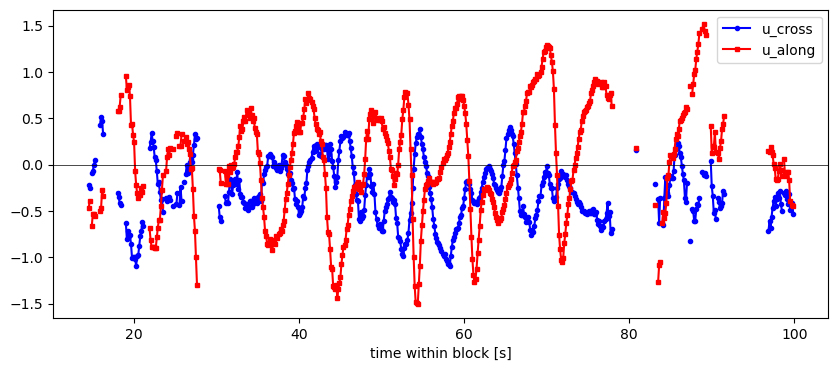

In [ ]:
# Plot u, v timeseries
# Note: plots above are block-averaged. Here we plot the timeseries within a block

# INTERPOLATION: COMPARE U,V VS ALONG, CROSS SHORE INTERPOLATION.   AGAIN, ZOOMED-IN TIMESERIES PLOT
t_max = np.datetime64('2024-12-19 16:00') # select time of highest water

ds = ds_QC.copy().sel(t=slice(t_max, t_max))

def rotate_velocities(u, v, thet):
    '''
    rotates vector (or array) [u,v] clockwise over angle thet (degrees)
    '''
    theta = thet / 180 * np.pi
    u_rot = u * np.cos(theta) + v * np.sin(theta)
    v_rot = -u * np.sin(theta) + v * np.cos(theta)
    return u_rot, v_rot

u_x = ds['u'].squeeze( )  
u_y = ds['v'].squeeze( )  



# rotate --------------
theta_deg = 36 # rotate by 36 degrees
[u_cross, u_along] = rotate_velocities(u_x, u_y, theta_deg)

# # Optional: fill gaps less than 4s in length with cubic interpolation, then rotate etc
# max_gap_setting = 4 # seconds
# u_x_int = u_x.interpolate_na( dim='N', method='cubic', max_gap=max_gap_setting)  #gap width, in seconds
# u_y_int = u_y.interpolate_na( dim='N', method='cubic', max_gap=max_gap_setting)  #gap width, in seconds
# [u_cross_int, u_along_int] = rotate_velocities(u_x_int, u_y_int, theta_deg)
# Daan: determine how interpolation is handled in QC (in dataset) or processed data (not shared?) and how it should be included here

# make a plot with ux, uy and interpolated versions  ------------------------------------------------
x_start = 0 # start index, in seconds
dx = 100

# Plot cross, alongshore velocities
plt.figure(figsize=(10, 4))
plt.plot(u_cross.N    [x_start*8:(x_start+dx)*8], u_cross    [x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='u_cross', color='blue')
plt.plot(u_along.N    [x_start*8:(x_start+dx)*8], u_along    [x_start*8:(x_start+dx)*8], 's-', markersize=3, label='u_along', color='red')
# plt.plot(u_cross_int.N[x_start*8:(x_start+dx)*8], u_cross_int[x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='u_cross interp.', color='cyan',zorder=0)
# plt.plot(u_along_int.N[x_start*8:(x_start+dx)*8], u_along_int[x_start*8:(x_start+dx)*8], 's-', markersize=3, label='u_along interp.', color='magenta',zorder=0)

plt.legend()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)     # add a horizontal line at y=0
plt.xlabel('time within block [s]')